In [1]:
import numpy as np
import sympy as sp
from sympy.tensor.array import derive_by_array
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
dim = 2
x = sp.symbols("".join([f"x_{i+1} " for i in range(dim) ])[:-1])
f = lambda x : 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
D = lambda expr: derive_by_array(expr,x)
Df = sp.lambdify([x],D(f(x)))
Hf = sp.lambdify([x],D(D(f(x))))

In [3]:
n = 2000
alpha = 1
rho = 0.94
c = -np.inf

/tmp/ipykernel_220568/3788652473.py:3: RuntimeWarning: overflow encountered in scalar power
  f = lambda x : 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in scalar power
  return numpy.array((-400*x_1*(-x_1**2 + x_2) + 2*x_1 - 2, -200*x_1**2 + 200*x_2))
/tmp/ipykernel_220568/3788652473.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  f = lambda x : 100*(x[1]-x[0]**2)**2 + (1-x[0])**2
<lambdifygenerated-1>:3: RuntimeWarning: invalid value encountered in scalar add
  return numpy.array((-400*x_1*(-x_1**2 + x_2) + 2*x_1 - 2, -200*x_1**2 + 200*x_2))
/home/martin/.local/lib/python3.12/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


array([nan, nan])

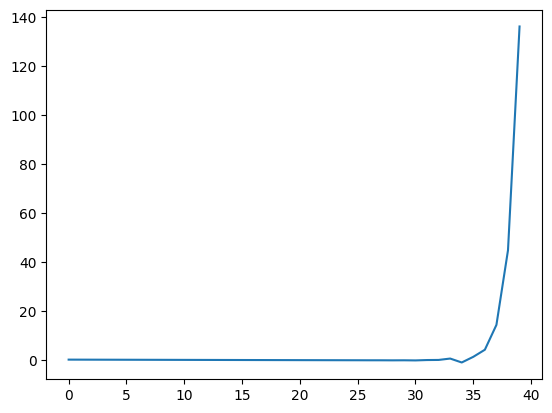

In [4]:
def backtracking(alpha, c, rho, x_k, f_k, Df_k, p_k):
    alpha_k = alpha
    backtracking = f(x_k + alpha_k*p_k) - (f_k + c*alpha_k*Df_k.T@p_k)
    while backtracking > 0 :
        alpha_k = alpha_k * rho
        backtracking = f(x_k + alpha_k*p_k) - (f_k + c*alpha_k*Df_k.T@p_k)
    return alpha_k

def newton(alpha, c, rho, n, x_0, f, Df, Hf):
    x_k = x_0
    x_list = [x_k]
    for i in range(n):
        f_k = f(x_k)
        Df_k = Df(x_k)
        B_k = Hf(x_k)
        p_k = -inv(B_k)@Df_k
        alpha_k = backtracking(alpha, c, rho, x_k, f_k, Df_k, p_k)
        x_k = x_k+alpha_k*p_k
        x_list.append(x_k)
    return x_list

def gradient_descent(alpha, c, rho, n, x_0, f, Df, Hf):
    x_k = x_0
    x_list = [x_k]
    B_k = np.eye(len(x_k))
    for i in range(n):
        f_k = f(x_k)
        Df_k = Df(x_k)
        p_k = -Df_k
        alpha_k = 0.01 #backtracking(alpha, c, rho, x_k, f_k, Df_k, p_k)
        x_k = x_k+alpha_k*p_k
        x_list.append(x_k)
    return x_list

x_0 = np.array([0,0])
# x_list1 = newton(alpha, c, rho, n, x_0, f, Df, Hf)
x_list2 = gradient_descent(alpha, c, rho, n, x_0, f, Df, Hf)
plt.plot(np.log(np.linalg.norm(np.array(x_list2)-np.array([1,1]), axis = 1)))
x_list2[-1]

In [5]:
if []:
    print(True)